In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [2]:
data = pd.read_csv("../data/crabs.csv") 
data.head(2)

Unnamed: 0 sp sex  index   FL   RW    CL    CW   BD
0           1  B   M      1  8.1  6.7  16.1  19.0  7.0
1           2  B   M      2  8.8  7.7  18.1  20.8  7.4

In [3]:
# Sélection des variables quantitatives et conversion en forme verticale
x = data.iloc[:,4:9].values
x

array([[ 8.1,  6.7, 16.1, 19. ,  7. ],
       [ 8.8,  7.7, 18.1, 20.8,  7.4],
       [ 9.2,  7.8, 19. , 22.4,  7.7],
       [ 9.6,  7.9, 20.1, 23.1,  8.2],
       [ 9.8,  8. , 20.3, 23. ,  8.2],
       [10.8,  9. , 23. , 26.5,  9.8],
       [11.1,  9.9, 23.8, 27.1,  9.8],
       [11.6,  9.1, 24.5, 28.4, 10.4],
       [11.8,  9.6, 24.2, 27.8,  9.7],
       [11.8, 10.5, 25.2, 29.3, 10.3],
       [12.2, 10.8, 27.3, 31.6, 10.9],
       [12.3, 11. , 26.8, 31.5, 11.4],
       [12.6, 10. , 27.7, 31.7, 11.4],
       [12.8, 10.2, 27.2, 31.8, 10.9],
       [12.8, 10.9, 27.4, 31.5, 11. ],
       [12.9, 11. , 26.8, 30.9, 11.4],
       [13.1, 10.6, 28.2, 32.3, 11. ],
       [13.1, 10.9, 28.3, 32.4, 11.2],
       [13.3, 11.1, 27.8, 32.3, 11.3],
       [13.9, 11.1, 29.2, 33.3, 12.1],
       [14.3, 11.6, 31.3, 35.5, 12.7],
       [14.6, 11.3, 31.9, 36.4, 13.7],
       [15. , 10.9, 31.4, 36.4, 13.2],
       [15. , 11.5, 32.4, 37. , 13.4],
       [15. , 11.9, 32.5, 37.2, 13.6],
       [15.2, 12.1, 32.3,

In [4]:
# Import de la librairie ACP
from sklearn.decomposition import PCA as sklearnPCA

In [5]:
# Projection sur 2 axes
pca = sklearnPCA(n_components = 2)

In [6]:
# Prédiction des scores des deux facteurs retenus
principalComponents = pca.fit_transform(x)

In [7]:
# Visualisation de la matrice dans le nouveau repére
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

Axe principal 1  Axe principal 2
0        26.464575         0.576534
1        23.561737         0.336420

In [8]:
finaldf = pd.concat([principaldf, data[['sp']]], axis = 1)
finaldf.head(2)

Axe principal 1  Axe principal 2 sp
0        26.464575         0.576534  B
1        23.561737         0.336420  B

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Axe principal 1', ylabel='Axe principal 2'>

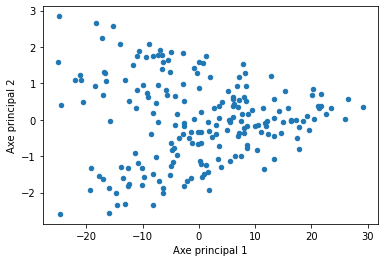

In [10]:
# Première représentation graphique sans distinction sur la variable qualitative
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

In [11]:
# Attribut pour rechercher les élements uniques d'une liste
finaldf.sp.unique()

array(['B', 'O'], dtype=object)

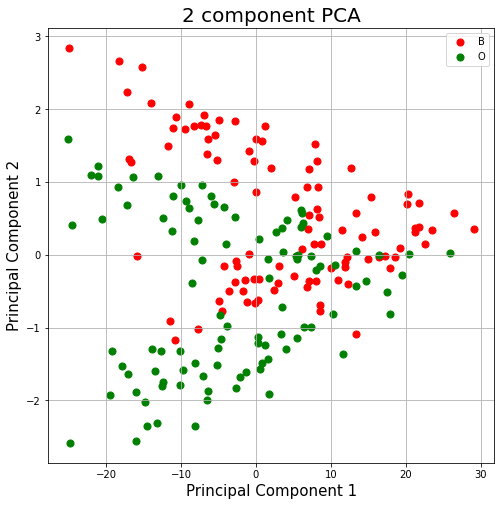

In [12]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B', 'O']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['sp'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [13]:
# Création de la fonction Visu2D (df, target, colors, output_var)
def Visu2D (data, targets, colors, output_var):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    for target, color in zip(targets,colors):
        indicesToKeep = output_var == target
        ax.scatter(data.loc[indicesToKeep, 'Axe principal 1']
                   , data.loc[indicesToKeep, 'Axe principal 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [14]:
#Paramètres d'entrées de la fonction Visu2D
targets = ['B', 'O']
colors = ['r', 'g']
output_var = data['sp']

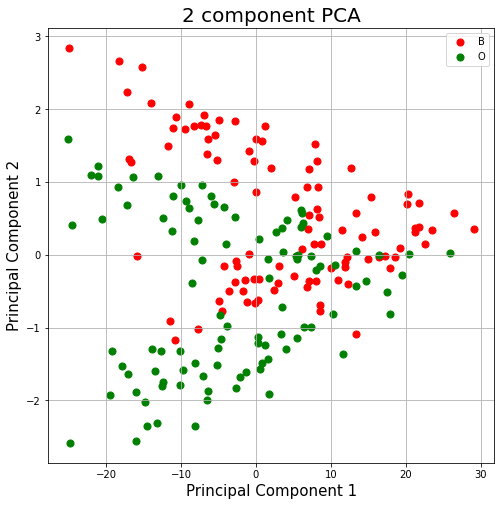

In [15]:
# Utilisation de la fonction Visu2D
Visu2D(finaldf, targets, colors, output_var)

In [16]:
# Modèle représentatif car couvert à plus de 95%
pca.explained_variance_ratio_

array([0.9824718 , 0.00905511])

# 2 eme acp

In [18]:
finaldf = pd.concat([principaldf, data[['sex']]], axis = 1)
finaldf.head(2)

Axe principal 1  Axe principal 2 sex
0        26.464575         0.576534   M
1        23.561737         0.336420   M

<AxesSubplot:xlabel='Axe principal 1', ylabel='Axe principal 2'>

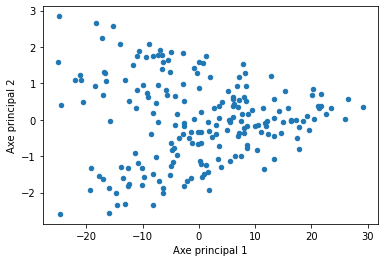

In [19]:
# Première représentation graphique sans distinction sur la variable qualitative
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

In [20]:
finaldf.sex.unique()

array(['M', 'F'], dtype=object)

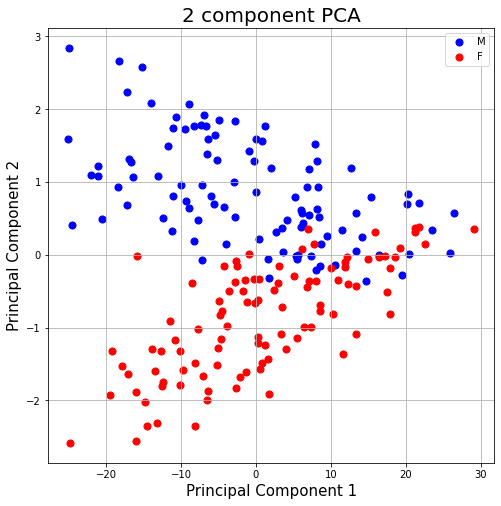

In [21]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'F']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['sex'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [22]:
# Création de la fonction Visu2D (df, target, colors, output_var)
def Visu2D (data, targets, colors, output_var):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    for target, color in zip(targets,colors):
        indicesToKeep = output_var == target
        ax.scatter(data.loc[indicesToKeep, 'Axe principal 1']
                   , data.loc[indicesToKeep, 'Axe principal 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [23]:
#Paramètres d'entrées de la fonction Visu2D
targets = ['M', 'F']
colors = ['b', 'r']
output_var = data['sex']

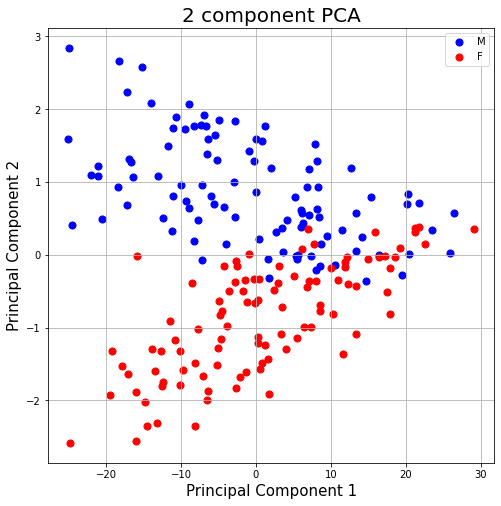

In [24]:
Visu2D(finaldf, targets, colors, output_var)

In [25]:
pca.explained_variance_ratio_

array([0.9824718 , 0.00905511])

# ACP avec les 2 variables quali

In [32]:
finaldf = pd.concat([principaldf, data[['sp']],data[['sex']]], axis = 1)
finaldf.head(2)

Axe principal 1  Axe principal 2 sp sex
0        26.464575         0.576534  B   M
1        23.561737         0.336420  B   M

<AxesSubplot:xlabel='Axe principal 1', ylabel='Axe principal 2'>

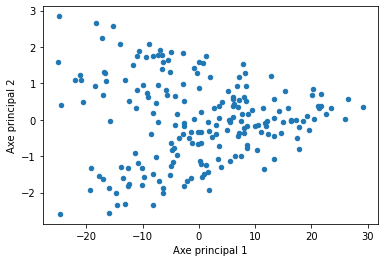

In [33]:
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

In [35]:
finaldf.sex.unique()


array(['M', 'F'], dtype=object)

In [36]:
finaldf.sp.unique()

array(['B', 'O'], dtype=object)

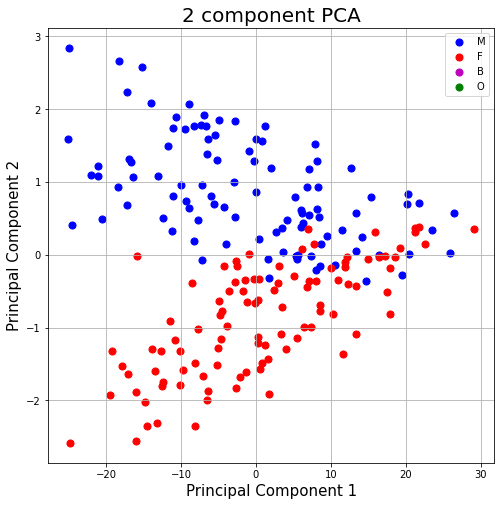

In [38]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'F','B', 'O']
colors = ['b', 'r', 'm','g']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['sex'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

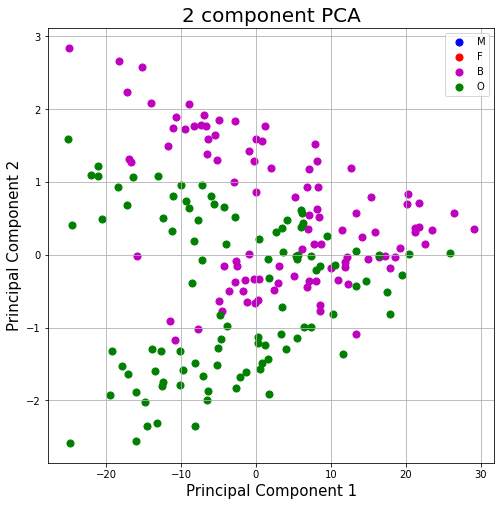

In [39]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'F','B', 'O']
colors = ['b', 'r', 'm','g']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['sp'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()